![example](images/director_shot.jpeg)

# Project Title

**Authors:** Wesley Yu
***

## Overview

This project analyzes data from various movie databases. Exploratory data analysis of the database shows how trends in movie release dates, genres, and production budget can effect the movie's worldwide box office results. Microsoft can use this analysis to help decide which film projects to take on.

## Business Problem

Microsoft is taking their first step into the movie business and will need to sift through an enourmous amount of scripts 
to find a profitable project to take on. Using data from movie databases, we can find patterns and trends that can help Microsoft narrow down their choices.


## Data Understanding

In this project, we will be looking at datasets from two sources. The Numbers and TMDB.
The Numbers has been tracking data about the movie industry since 1997, having the most up to date information on box office numbers and movie financials.
TMDB is a community built and backed database on movies and TV shows. Data is constanly added and updated by a strong community that is passionate about movie and TV show data.

The Numbers dataset we are working with has records from 1915 to 2020. Data on various movie's production budget, domestic, and worldwide gross box office numbers are included.

TMDB dataset includes records from 1930 to 2020. Every movie has a unique TMDB ID associated to them. The dataset provides
genre ids, popularity, and movie rating based off their community.

We will be combining these two datasets to match movie financials with there respective genres and ratings.


In [16]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import seaborn as sns
import json

%matplotlib inline

In [17]:
# Here you run your code to explore the data
numdf = pd.read_csv('Data/tn.movie_budgets.csv.gz')
print(numdf.info())
numdf.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB
None


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [37]:
numdf.value_counts(['release_date', 'movie'])

release_date  movie                  
Sep 9, 2016   When the Bough Breaks      1
Feb 23, 1996  Rumble in the Bronx        1
Feb 23, 2000  Wonder Boys                1
Feb 23, 2001  3000 Miles to Graceland    1
              Monkeybone                 1
                                        ..
May 11, 2018  Life of the Party          1
May 12, 1995  Crimson Tide               1
              The Perez Family           1
May 12, 1999  Trippinâ                 1
Apr 1, 1975   Death Race 2000            1
Length: 5782, dtype: int64

In [32]:
tmdf = pd.read_csv('Data/tmdb.movies.csv.gz')
print(tmdf.info())
tmdf.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB
None


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


## Data Preparation

Describe and justify the process for preparing the data for analysis.

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***

In [4]:
# Here you run your code to clean the data
numdf = numdf.drop(columns = ['id', 'domestic_gross'])

In [5]:
tmdf = tmdf.drop(columns = ['Unnamed: 0', 'original_language', 'title', 'popularity', 'vote_count'])

In [ ]:
tmdf = tmdf.drop_duplicates(subset = 'id', keep = 'first')

In [6]:
numdf = numdf.rename(columns = {'movie': 'title'})
tmdf = tmdf.rename(columns = {'original_title': 'title'})

In [7]:
numdf['release_date'] = pd.to_datetime(numdf['release_date'])
tmdf['release_date'] = pd.to_datetime(tmdf['release_date'])

In [9]:
df = numdf.merge(tmdf, on = ['title', 'release_date'])

In [11]:
df['production_budget'] = df['production_budget'].map(lambda x: int(x.strip('$').replace(',','')))
df['worldwide_gross'] = df['worldwide_gross'].map(lambda x: int(x.strip('$').replace(',','')))

In [12]:
df['genre_ids'] = df['genre_ids'].str.strip('[]').str.split(', ') #turn string into list of strings containing each genre id

## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

In [ ]:
df['month'] = df['release_date'].dt.strftime('%b')

In [ ]:
order_list = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
sns.set_style('darkgrid')
sns.set(font_scale = 2)
plt.figure(figsize = (20,20))
ax = sns.barplot(x = 'month', y = 'worldwide_gross', data = df, palette = 'deep', order = order_list)
ax.set_title('Average Worldwide Box Office by Month of release')
ax.set(xlabel = 'Release Months', ylabel = 'Worldwide Gross Box Office USD')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.2f}'.format(x/1000000) + 'M'))
plt.show()

In [ ]:
genre_data = df.explode('genre_ids')

In [ ]:
grouped_genre = genre_data.groupby('genre_ids')['worldwide_gross'].mean()

In [ ]:
genre_list = {'28': 'Action', '12': 'Adventure', '16': 'Animation', '35': 'Comedy', '80': 'Crime', '99': 'Documentary',\
              '18': 'Drama', '10751': 'Family', '14': 'Fantasy', '36': 'History', '27': 'Horror', '10402': 'Music',\
              '9648': 'Mystery', '10749': 'Romance', '878': 'Sci-Fi', '10770': 'TV Movie', '53': 'Thriller', '10752': 'War',\
              '37': 'Western', '': 'No Genre'}
grouped_genre = grouped_genre.rename(index = genre_list)

In [ ]:
grouped_genre = grouped_genre.sort_values(ascending = False)

In [ ]:
sns.set_style('darkgrid')
sns.set(font_scale = 2)
plt.figure(figsize = (20,20))
ax = sns.barplot(x = grouped_genre, y = grouped_genre.index , palette = 'deep')
ax.set_title('Average Worldwide Box Office by Genres')
ax.set(ylabel = 'Genres', xlabel = 'Average Worldwide Gross Box Office USD')
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.2f}'.format(x/1000000) + 'M'))
plt.show()

In [ ]:
df['production_budget'].corr(df['worldwide_gross'])

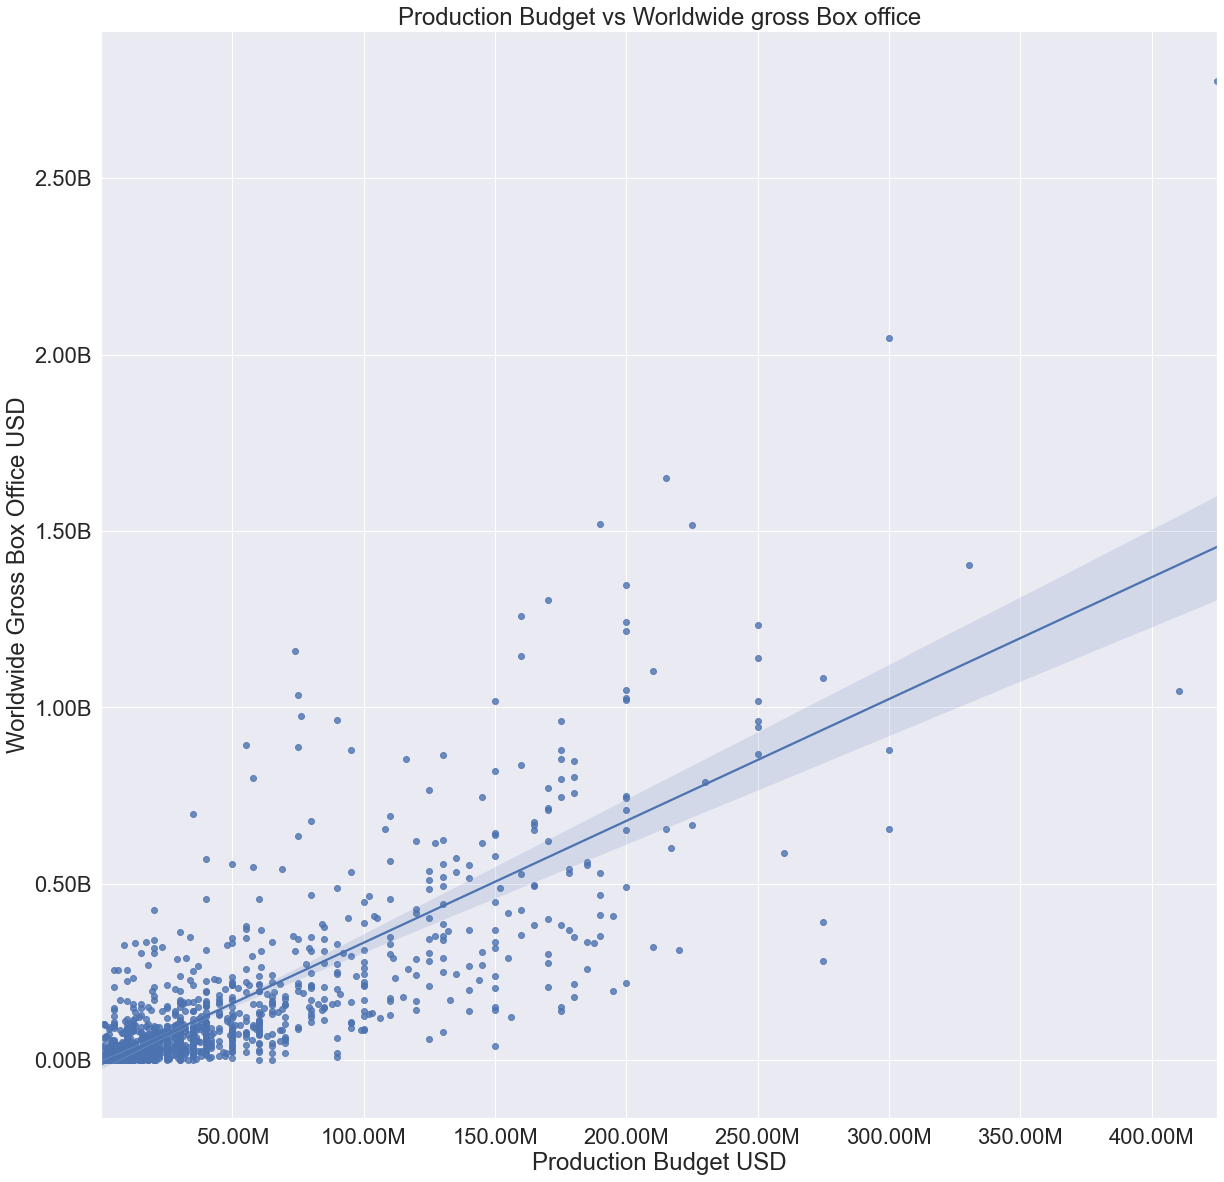

In [19]:
sns.set_style('darkgrid')
sns.set(font_scale = 2)
plt.figure(figsize = (20,20))
ax = sns.regplot(x = 'production_budget', y = 'worldwide_gross', data = df)
ax.set_title('Production Budget vs Worldwide gross Box office')
ax.set(xlabel = 'Production Budget USD', ylabel = 'Worldwide Gross Box Office USD')
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.2f}'.format(x/1000000) + 'M'))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.2f}'.format(x/1000000000) + 'B'))
plt.show()

## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***